In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_CF = pd.read_csv('center_info.csv')
train_meal = pd.read_csv('meal_info.csv')

In [3]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
df.shape

(456548, 9)

In [6]:
test.shape

(32573, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
train_CF.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
train_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
df['checkout_price'] = df['checkout_price'].astype(int)
df['base_price'] = df['base_price'].astype(int)

In [11]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,331.880131,353.792874,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.955354,160.742406,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.000000,55.000000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.000000,243.000000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.000000,310.000000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.000000,458.000000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.000000,866.000000,1.000000,1.00000,24299.000000


In [12]:
df.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price              692
base_price                  676
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

In [13]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136,152,0,0,177
1,1466964,1,55,1993,136,135,0,0,270
2,1346989,1,55,2539,134,135,0,0,189
3,1338232,1,55,2139,339,437,0,0,54
4,1448490,1,55,2631,243,242,0,0,40


In [14]:
df['center_id'].unique()

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61],
      dtype=int64)

In [15]:
# Merge the remaining training dataset to train file
df = pd.merge(df,train_CF, on='center_id')
df = pd.merge(df,train_meal, on='meal_id')

In [16]:
# For Testing dataset
test = pd.merge(test,train_CF, on='center_id')
test = pd.merge(test,train_meal, on='meal_id')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null int32
base_price               456548 non-null int32
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(1), int32(2), int64(9), object(3)
memory usage: 47.0+ MB


In [18]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136,152,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135,152,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132,133,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135,134,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146,147,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [19]:
a = df['category'].unique()
a

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [20]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [21]:
# Importing Labelencoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [22]:
df['center_type'] = lb.fit_transform(df['center_type'])
df['category'] = lb.fit_transform(df['category'])
df['cuisine'] = lb.fit_transform(df['cuisine'])

In [23]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136,152,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135,152,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132,133,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135,134,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146,147,0,0,215,647,56,2,2.0,0,3


In [24]:
df.drop(['center_id','meal_id','week'],axis=1,inplace=True)

In [25]:
df.head()

,id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,136,152,0,0,177,647,56,2,2.0,0,3
1,1018704,135,152,0,0,323,647,56,2,2.0,0,3
2,1196273,132,133,0,0,96,647,56,2,2.0,0,3
3,1116527,135,134,0,0,163,647,56,2,2.0,0,3
4,1343872,146,147,0,0,215,647,56,2,2.0,0,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 12 columns):
id                       456548 non-null int64
checkout_price           456548 non-null int32
base_price               456548 non-null int32
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null int32
op_area                  456548 non-null float64
category                 456548 non-null int32
cuisine                  456548 non-null int32
dtypes: float64(1), int32(5), int64(6)
memory usage: 36.6 MB


In [27]:
df['op_area'] = df['op_area'].astype(int)

In [28]:
df.head()

,id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,136,152,0,0,177,647,56,2,2,0,3
1,1018704,135,152,0,0,323,647,56,2,2,0,3
2,1196273,132,133,0,0,96,647,56,2,2,0,3
3,1116527,135,134,0,0,163,647,56,2,2,0,3
4,1343872,146,147,0,0,215,647,56,2,2,0,3


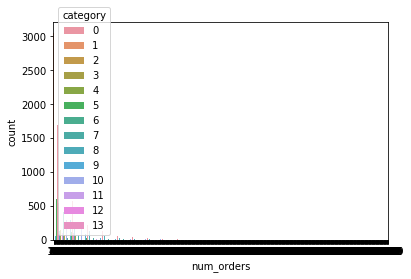

In [29]:
sns.countplot(x='num_orders',hue='category',data=df)

In [30]:
df.columns

Index(['id', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [31]:
df.shape

(456548, 12)

In [32]:
x = df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11]].values
y = df.iloc[:,5].values

In [33]:
# Splitting the Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
# Feature Scaling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
lr.intercept_

322.97263888886476

In [37]:
lr.coef_

array([ 1.50320588e-06, -4.56829264e-01, -6.89558870e-01,  2.92794396e+02,
        2.69665098e+02,  1.27689351e-01,  7.36174513e-01, -4.65208771e+00,
        5.36620404e+01,  1.37811715e+01, -6.62631944e+01])

In [38]:
lr_pred = lr.predict(x_test)

In [39]:
lr_pred

array([613.21891436, 113.32434323, 359.01226015, ..., 228.57075313,
        93.18659951,  -4.66533147])

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 195.70840580669883
MSE: 121536.23817659433
RMSE: 348.62047871086736


In [42]:
lr_pred[lr_pred<0]=0
print('RMSLE',100*np.sqrt(metrics.mean_squared_log_error(y_test,lr_pred)))

RMSLE 156.38146754390561


In [43]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
dt_pred = dt.predict(x_test)

In [46]:
dt_pred

array([379.,  54.,  42., ..., 406.,  27., 177.])

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

MAE: 122.11939160833035
MSE: 69453.43608996207
RMSE: 26354.01982430044


In [48]:
dt_pred[dt_pred<0]=0
print('RMSLE',100*np.sqrt(metrics.mean_squared_log_error(y_test,dt_pred)))

RMSLE 75.48418400442276


In [49]:
# KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [50]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [51]:
knn_pred = knn.predict(x_test)

In [52]:
knn_pred

array([102.8, 273.2, 357.6, ...,  89.8, 116.6, 251.6])

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

MAE: 219.3004774963421
MSE: 162567.5360596476
RMSE: 40319.66468854219


In [54]:
knn_pred[knn_pred<0]=0
print('RMSLE',100*np.sqrt(metrics.mean_squared_log_error(y_test,knn_pred)))

RMSLE 123.03300601940725


In [55]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')>

In [56]:
# Gradient Boosing Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [57]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
gb_pred = gb.predict(x_test)
gb_pred

array([424.5212973 , 102.36161502, 153.93057672, ..., 394.32790293,
        25.69735957, 116.44516458])

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, gb_pred))
print('MSE:', metrics.mean_squared_error(y_test, gb_pred))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))

MAE: 128.8849266495513
MSE: 64672.912815267206
RMSE: 25430.869590965074


In [60]:
gb_pred[gb_pred<0]=0
print('RMSLE',100*np.sqrt(metrics.mean_squared_log_error(y_test,gb_pred)))

RMSLE 104.79013611780385


In [61]:
gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)>

In [62]:
# By sklearn.ensemblerest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [63]:
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
rf_pred = rf.predict(x_test)
rf_pred

array([313.5, 181. ,  39.8, ..., 331.1,  52.7, 260.6])

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', 100*np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 97.11197333029605
MSE: 42583.25421668696
RMSE: 20635.710362545546


In [66]:
rf_pred[rf_pred<0]=0
print('RMSLE',100*np.sqrt(metrics.mean_squared_log_error(y_test,rf_pred)))

RMSLE 59.880177107539566


In [67]:
# Tuning the Best Model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [68]:
params

{'legend.fontsize': 'x-large',
 'figure.figsize': (30, 10),
 'axes.labelsize': 'x-large',
 'axes.titlesize': 'x-large',
 'xtick.labelsize': 'x-large',
 'ytick.labelsize': 'x-large'}

In [69]:
param_grid = { "min_samples_split": [2, 4, 8, 16], "min_samples_leaf": [1, 2, 3, 4], "max_leaf_nodes": [None, 10, 20, 100] }

grid_cv_dtm = GridSearchCV(dt, param_grid, cv=5)

grid_cv_dtm.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 2, 3, 4], 'max_leaf_nodes': [None, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.6847543777513531
Best Hyperparameters::
{'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 16}


In [71]:
df1 = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.618356,0.037780,0.059375,0.006248,None,1,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.496580,0.557236,...,0.520329,0.022037,32,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,3.414124,0.048315,0.061032,0.012392,None,1,4,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.540694,0.564444,...,0.554289,0.011818,31,0.972533,0.972678,0.969618,0.974364,0.973823,0.972603,0.001644
2,3.369207,0.163066,0.046878,0.000002,None,1,8,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.599538,0.616491,...,0.608480,0.005599,12,0.921309,0.922953,0.919437,0.924523,0.921336,0.921912,0.001716
3,3.222462,0.065010,0.039776,0.001165,None,1,16,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.663478,0.650410,...,0.658566,0.004777,5,0.863712,0.867168,0.861066,0.867065,0.868386,0.865479,0.002699
4,3.357933,0.027332,0.050370,0.000489,None,2,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 2...",0.560237,0.614165,...,0.592169,0.020754,29,0.948914,0.949252,0.944368,0.949080,0.949596,0.948242,0.001950


In [72]:
grid_cv_dtm.best_estimator_.fit(x_train, y_train)
y_pred = grid_cv_dtm.best_estimator_.predict(x_test)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

RMSLE: 61.193561541986206


In [73]:
# Checking for Testing Dataset
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [74]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()

In [75]:
tcols = test.columns
tcols

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [76]:
test['center_type'] = lb1.fit_transform(test['center_type'])
test['category'] = lb1.fit_transform(test['category'])
test['cuisine'] = lb1.fit_transform(test['cuisine'])

In [ ]:
test = test[tcols]

In [77]:
test.drop(['week','center_id','meal_id'],axis=1,inplace=True)

In [ ]:
test.head()

In [ ]:
rf_pred = rf.predict(x_test)
rf_pred[rf_pred<0] = 0
submit = pd.DataFrame({'id' : test['id'],'num_orders' : rf_pred})